# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

> En general los valores de las propiedades dependen de la ubicación en la que se encuentran, los metros cuadrados, la antigüedad de la vivienda, su estado, si posee cochera o no, la cantidad de ambientes o pileta. Trabajar con estas características sería útil para poder estimar el precio de un inmueble.

> Cada dato debería estar registrado en una unidad de medida definida. Por ejemplo, establecer todos los precios en dólares estadounidenses, o la superficie en m$^2$. Algunos datos son categóricos (por ejemplo, zona de ubicación, estado de la vivienda) y otros numéricos (cantidad de ambientes, superficie).

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
prope = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
num_col = len(prope.columns)
num_fil = len(prope)

print('El dataset posee', num_col, 'columnas y', num_fil, 'filas.')

El dataset posee 19 columnas y 146660 filas.


In [ ]:
prope.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
# nombres de las columnas
print(prope.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [ ]:
# valores faltantes por columna
print(prope.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
print('Cantidad de tipos de propiedad:', len(prope.property_type.value_counts()), '\n')

print('·Instancias por cada tipo de propiedad·')
tipos_se = prope.property_type.value_counts()
print(tipos_se)

Cantidad de tipos de propiedad: 10 

·Instancias por cada tipo de propiedad·
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


In [ ]:
# creo un dataframe a partir de los datos calculados arriba, originalmente series (index, values)

tipos = pd.DataFrame({'Tipo_propiedad':tipos_se.index, 'Cantidad':tipos_se.values})

print(tipos)

    Tipo_propiedad  Cantidad
0     Departamento    107326
1             Casa     21521
2               PH     14298
3             Lote      1312
4          Oficina       658
5             Otro       374
6  Local comercial       325
7    Casa de campo       322
8         Depósito       265
9          Cochera       259


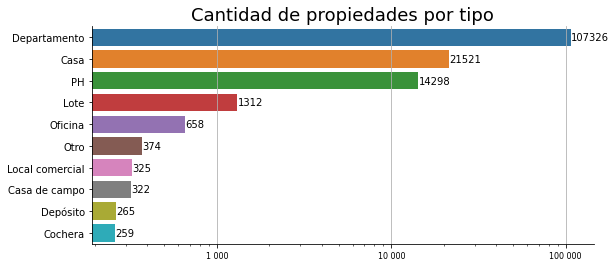

In [ ]:
# gráfico de cantidad de propiedades por tipo

plt.figure(figsize=(9, 4))

g = sns.barplot(x='Cantidad', y='Tipo_propiedad', data=tipos)
g.set_xscale("log")
g.set_title( 'Cantidad de propiedades por tipo' , size = 18 )
g.set_xlabel('')
g.set_ylabel('')
g.set_xticklabels(labels=['0', '0', '1 000', '10 000', '100 000'], size=8)


# mostrar valores al lado de cada barra
for p in g.patches:
    width = p.get_width()    # get bar length
    g.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 0 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


sns.despine() # remove top and right border
g.xaxis.grid(True) # Show the vertical gridlines

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
prope.l2.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

[Text(0, 0, 'Capital Federal'),
 Text(0, 0, 'GBA Norte'),
 Text(0, 0, 'GBA Sur'),
 Text(0, 0, 'GBA Oeste')]

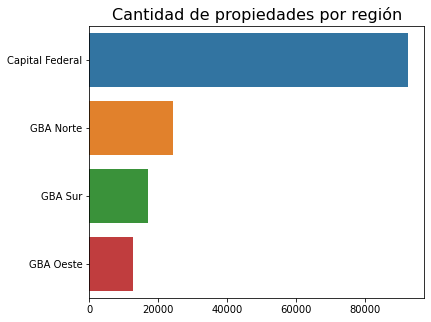

In [ ]:
# gráfico cant propiedades por región

plt.figure(figsize=(6, 5))

g_reg = sns.countplot(y='l2',data=prope, order=prope['l2'].value_counts().index)
                                          # ordenar las barras de mayor a menor

g_reg.set_title( 'Cantidad de propiedades por región' , size = 16 )
g_reg.set_xlabel('')
g_reg.set_ylabel('')
g_reg.set_yticklabels(labels=["Capital Federal", "GBA Norte", "GBA Sur", "GBA Oeste"], size=10)

In [ ]:
# defino paleta de colores para capital federal
pal_caba = sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

Text(0, 0.5, '')

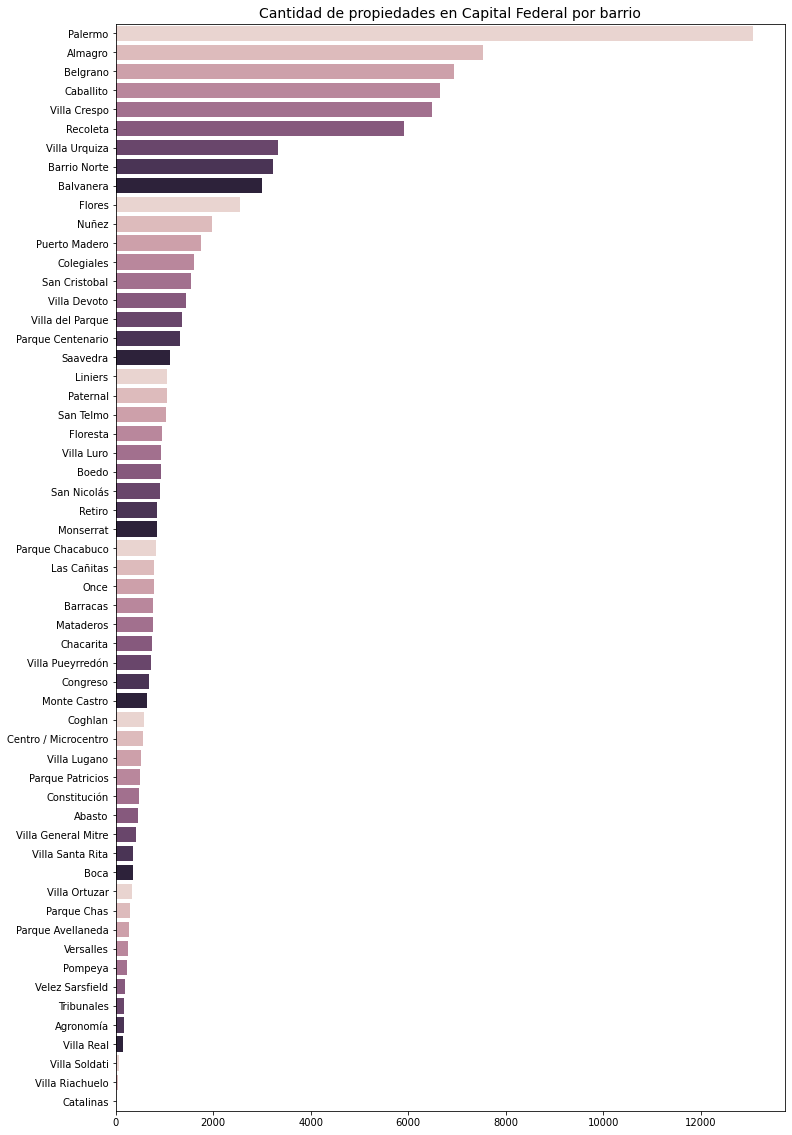

In [ ]:
# capital federal

plt.figure(figsize=(12, 20))

regiones_caba = prope[prope['l2']=='Capital Federal']

g_caba = sns.countplot(y='l3', data=regiones_caba, palette= pal_caba, order=regiones_caba['l3'].value_counts().index)

g_caba.set_title( 'Cantidad de propiedades en Capital Federal por barrio' , size = 14)
g_caba.set_xlabel('')
g_caba.set_ylabel('')


Text(0, 0.5, '')

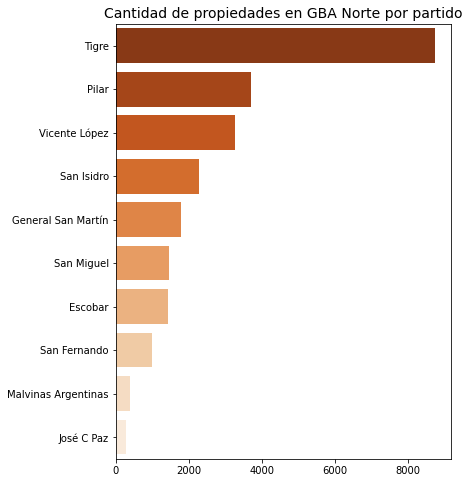

In [ ]:
# gba norte

plt.figure(figsize=(6, 8))

regiones_norte = prope[prope['l2']=='Bs.As. G.B.A. Zona Norte']

g_norte = sns.countplot(y='l3', data=regiones_norte, palette= 'Oranges_r', order=regiones_norte['l3'].value_counts().index)

g_norte.set_title( 'Cantidad de propiedades en GBA Norte por partido' , size = 14)
g_norte.set_xlabel('')
g_norte.set_ylabel('')

Text(0, 0.5, '')

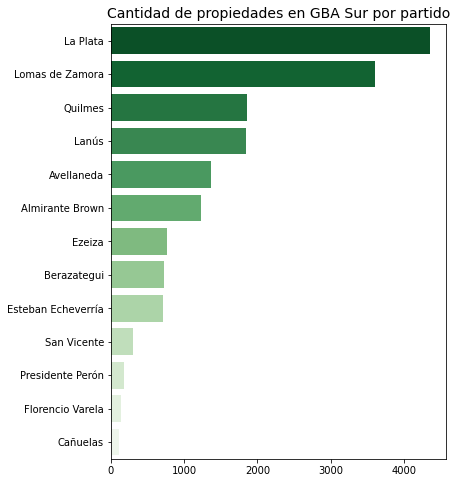

In [ ]:
# gba sur

plt.figure(figsize=(6, 8))

regiones_sur = prope[prope['l2']=='Bs.As. G.B.A. Zona Sur']

g_sur = sns.countplot(y='l3', data=regiones_sur, palette= 'Greens_r', order=regiones_sur['l3'].value_counts().index)

g_sur.set_title( 'Cantidad de propiedades en GBA Sur por partido' , size = 14)
g_sur.set_xlabel('')
g_sur.set_ylabel('')


Text(0, 0.5, '')

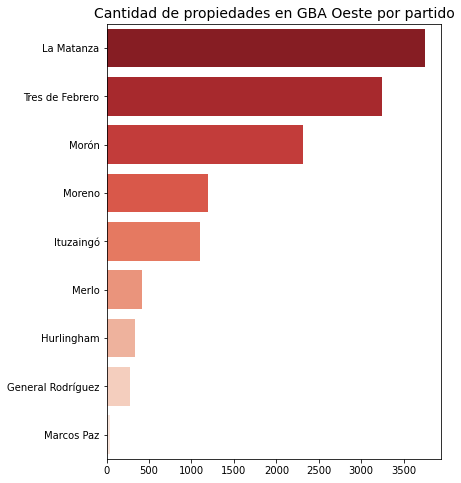

In [ ]:
# gba oeste

plt.figure(figsize=(6, 8))

regiones_oeste = prope[prope['l2']=='Bs.As. G.B.A. Zona Oeste']

g_oeste = sns.countplot(y='l3', data=regiones_oeste, palette= 'Reds_r', order=regiones_oeste['l3'].value_counts().index)

g_oeste.set_title( 'Cantidad de propiedades en GBA Oeste por partido' , size = 14)
g_oeste.set_xlabel('')
g_oeste.set_ylabel('')

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
# creo df5 con los departamentos, casas y phs de capital federal

df5 = regiones_caba[(regiones_caba['property_type'] == 'Departamento') |
                    (regiones_caba['property_type'] == 'Casa') |
                    (regiones_caba['property_type'] == 'PH')]

df5.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
# estadísticos de cada columna

prope[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


> Algunos valores de las superficies no son coherentes. En el caso de la superficie total, su desvío estándar es 10 veces su promedio. Algo similar ocurre con la superficie cubierta.



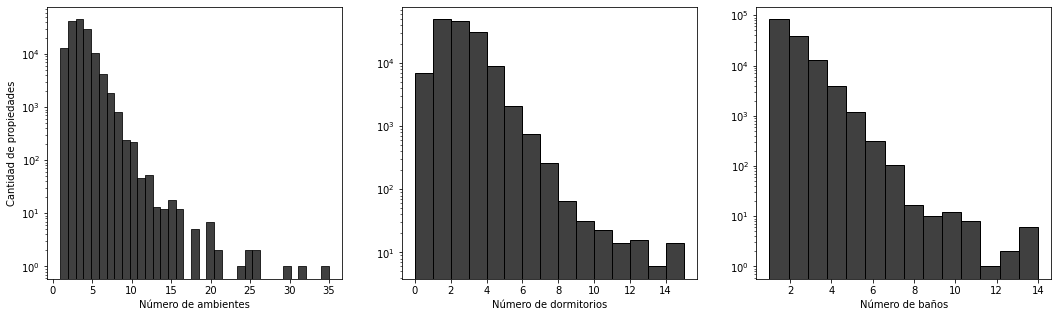

In [ ]:
# histogramas sobre número de ambientes, dormitorios y baños

plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
g_h1 = sns.histplot(data=prope, x='rooms', bins=35, color='black')

g_h1.set_yscale("log")

g_h1.set_xlabel('Número de ambientes')
g_h1.set_ylabel('Cantidad de propiedades')


plt.subplot(1,3,2)
g_h2 = sns.histplot(data=prope, x='bedrooms', bins=15, color='black')

g_h2.set_yscale("log")

g_h2.set_xlabel('Número de dormitorios')
g_h2.set_ylabel('')


plt.subplot(1,3,3)
g_h3 = sns.histplot(data=prope, x='bathrooms', bins=14, color='black')

g_h3.set_yscale("log")

g_h3.set_xlabel('Número de baños')
g_h3.set_ylabel('')


plt.show()

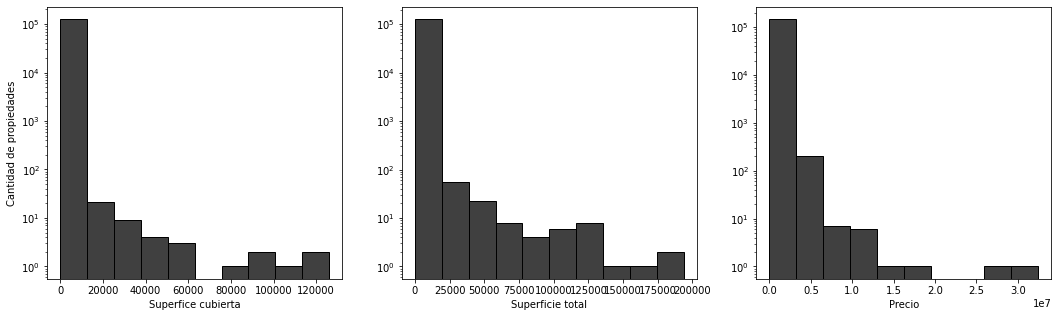

In [ ]:
# histogramas sobre número de sup total, sup cubierta y precio

plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
g_h1 = sns.histplot(data=prope, x='surface_covered', bins=10, color='black')

g_h1.set_yscale("log")

g_h1.set_xlabel('Superfice cubierta')
g_h1.set_ylabel('Cantidad de propiedades')


plt.subplot(1,3,2)
g_h2 = sns.histplot(data=prope, x='surface_total', bins=10, color='black')

g_h2.set_yscale("log")

g_h2.set_xlabel('Superficie total')
g_h2.set_ylabel('')


plt.subplot(1,3,3)
g_h3 = sns.histplot(data=prope, x='price', bins=10, color='black')

g_h3.set_yscale("log")

g_h3.set_xlabel('Precio')
g_h3.set_ylabel('')


plt.show()

''

<Figure size 720x504 with 0 Axes>

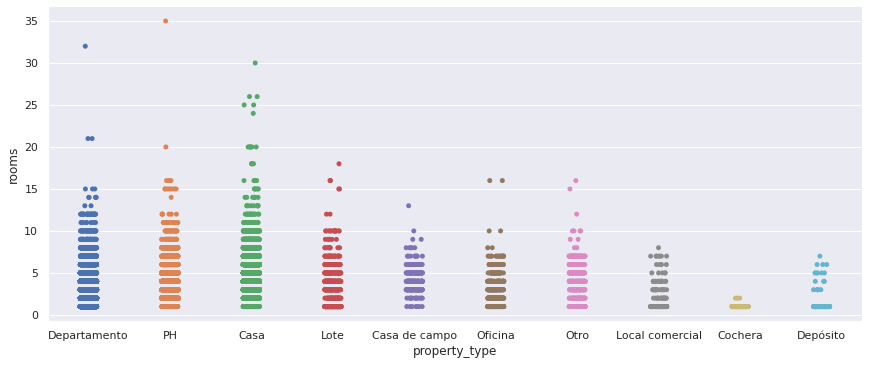

In [ ]:
plt.figure(figsize=(10, 7))

sns.catplot(data = prope, x = 'property_type', y = 'rooms', height=5, aspect=2.4)
;

Text(0, 0.5, '')

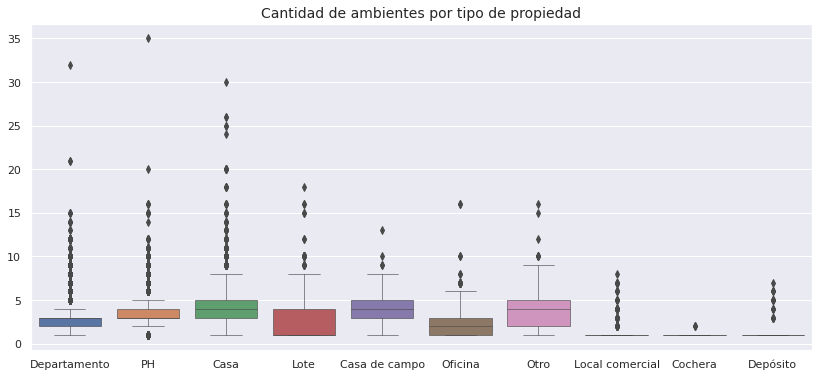

In [ ]:
plt.figure(figsize=(14, 6))

g_rooms = sns.boxplot(data = prope, x = 'property_type', y = 'rooms', linewidth=0.6)

g_rooms.set_title( 'Cantidad de ambientes por tipo de propiedad' , size = 14)
g_rooms.set_xlabel('')
g_rooms.set_ylabel('')

(0.0, 7.0)

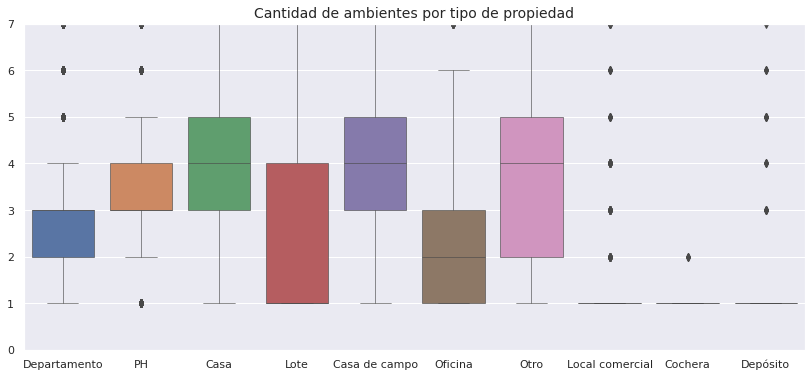

In [ ]:
# mismo gráfico, pero con eje vertical cortado

plt.figure(figsize=(14, 6))

g_rooms = sns.boxplot(data = prope, x = 'property_type', y = 'rooms', linewidth=0.6)

g_rooms.set_title( 'Cantidad de ambientes por tipo de propiedad' , size = 14)
g_rooms.set_xlabel('')
g_rooms.set_ylabel('')

# propongo que el eje vertical llegue hasta percentil99
rooms_lim = prope['rooms'].quantile(0.99)
g_rooms.set_ylim(0,rooms_lim)


Text(0, 0.5, '')

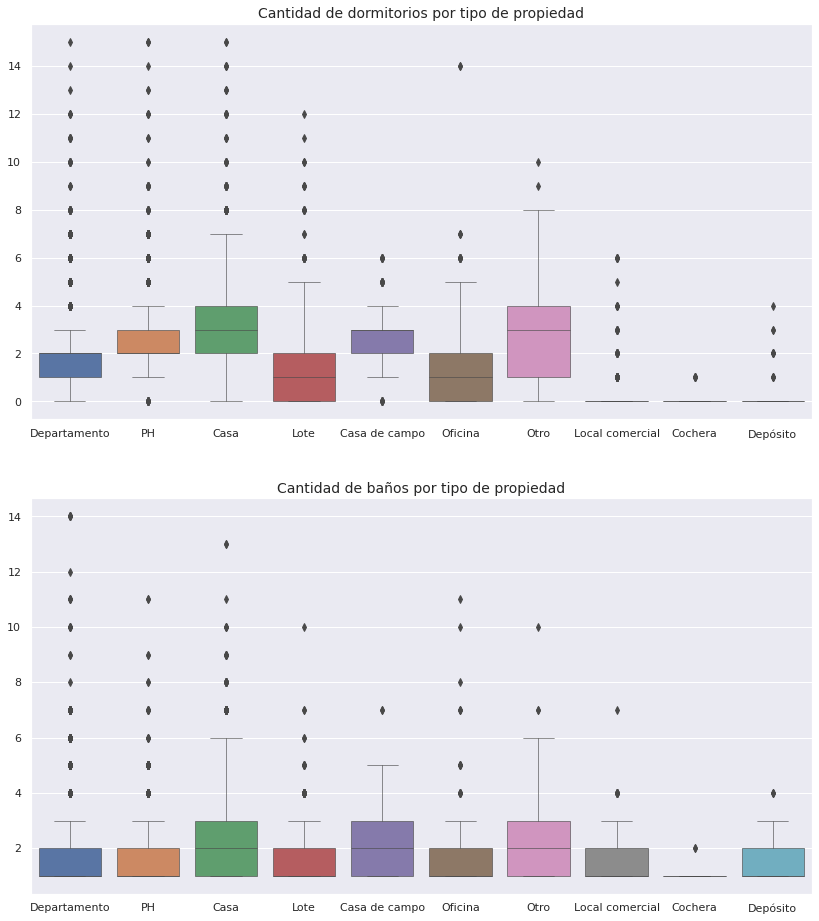

In [ ]:
# cantidad de dormitorios y baños

plt.figure(figsize=(14, 16))

plt.subplot(2,1,1)
g_bedrooms = sns.boxplot(data = prope, x = 'property_type', y = 'bedrooms', linewidth=0.6)

g_bedrooms.set_title( 'Cantidad de dormitorios por tipo de propiedad' , size = 14)
g_bedrooms.set_xlabel('')
g_bedrooms.set_ylabel('')

plt.subplot(2,1,2)
g_bathrooms = sns.boxplot(data = prope, x = 'property_type', y = 'bathrooms', linewidth=0.6)

g_bathrooms.set_title( 'Cantidad de baños por tipo de propiedad' , size = 14)
g_bathrooms.set_xlabel('')
g_bathrooms.set_ylabel('')

(0.0, 1570.0)

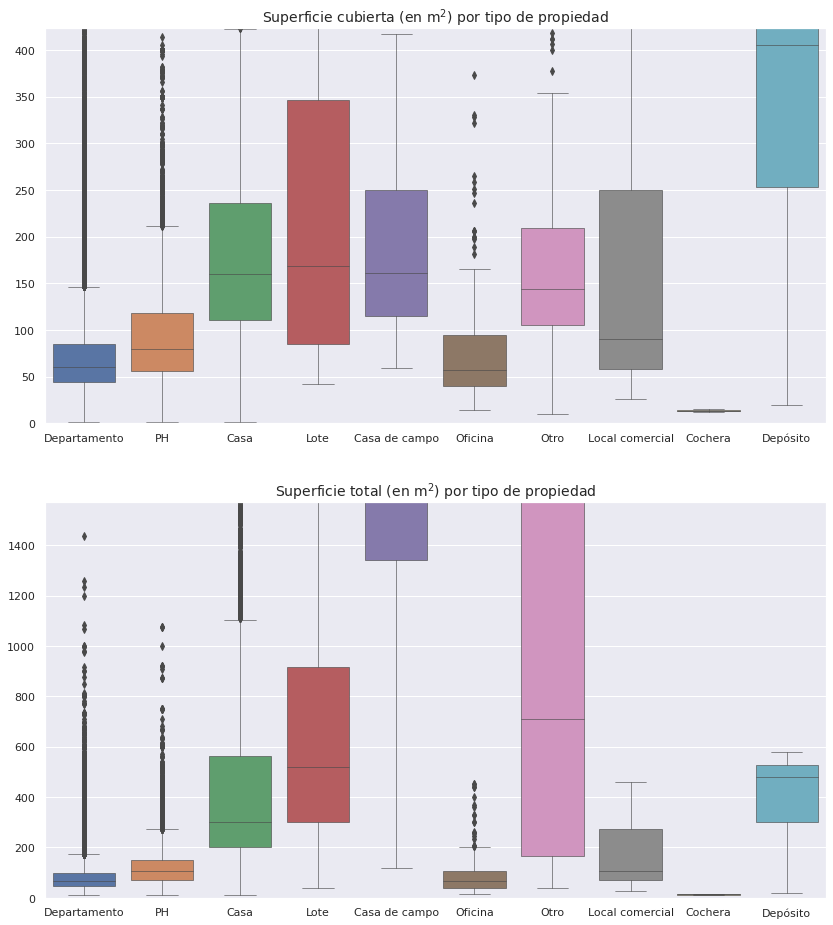

In [ ]:
# superficies cubierta y total

plt.figure(figsize=(14,16))

plt.subplot(2,1,1)
g_sc = sns.boxplot(data = prope, x = 'property_type', y = 'surface_covered', linewidth=0.6)
g_sc.set_title('Superficie cubierta (en m$^{2}$) por tipo de propiedad' , size = 14)
g_sc.set_xlabel('')
g_sc.set_ylabel('')

# propongo que el eje vertical llegue hasta percentil99
sc_lim = prope['surface_covered'].quantile(0.99)
g_sc.set_ylim(0,sc_lim)


plt.subplot(2,1,2)
g_st = sns.boxplot(data = prope, x = 'property_type', y = 'surface_total', linewidth=0.6)
g_st.set_title('Superficie total (en m$^{2}$) por tipo de propiedad' , size = 14)
g_st.set_xlabel('')
g_st.set_ylabel('')

# propongo que el eje vertical llegue hasta percentil99
st_lim = prope['surface_total'].quantile(0.99)
g_st.set_ylim(0,st_lim)

(0.0, 1450.0)

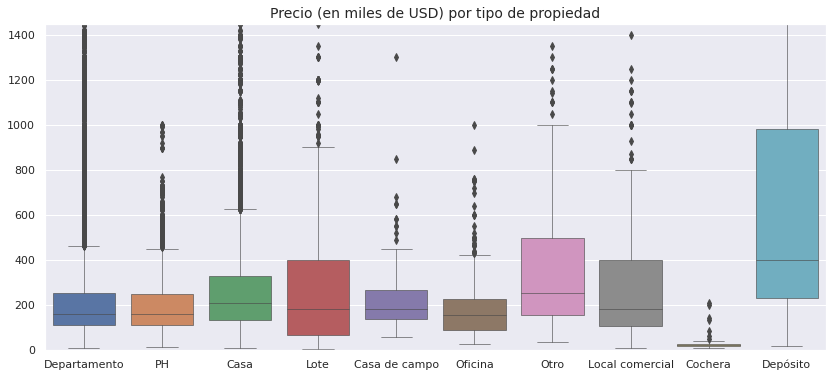

In [ ]:
# precio por tipo de propiedad

plt.figure(figsize=(14,6))

g_price = sns.boxplot(data = prope, x = 'property_type', y = prope['price']/1000, linewidth=0.6)

g_price.set_title( 'Precio (en miles de USD) por tipo de propiedad' , size = 14)
g_price.set_xlabel('')
g_price.set_ylabel('')

# propongo que el eje vertical llegue hasta percentil99
price_lim = (prope['price']/1000).quantile(0.99)
g_price.set_ylim(0,price_lim)

In [ ]:
# filtro los registros donde la superficie cubierta es mayor a la total

prope_filtr = prope[prope['surface_total']>=prope['surface_covered']]

len(prope_filtr)

prope_filtr.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


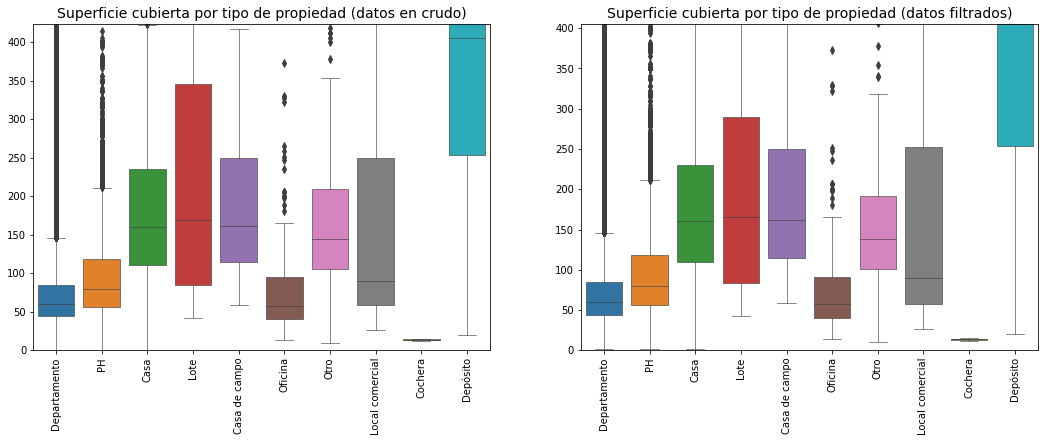

In [ ]:
#comparo la superficie cubierta antes y después de filtrar
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
g_sc = sns.boxplot(data = prope, x = 'property_type', y = 'surface_covered', linewidth=0.6)
g_sc.set_title('Superficie cubierta por tipo de propiedad (datos en crudo)' , size = 14)
g_sc.set_xlabel('')
g_sc.set_ylabel('')
# propongo que el eje vertical llegue hasta percentil99
sc_lim = prope['surface_covered'].quantile(0.99)
g_sc.set_ylim(0,sc_lim)
g_sc.set_xticklabels(g_sc.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
g_sc_filtr = sns.boxplot(data = prope_filtr, x = 'property_type', y = 'surface_covered', linewidth=0.6, order=['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito'])
g_sc_filtr.set_title('Superficie cubierta por tipo de propiedad (datos filtrados)' , size = 14)
g_sc_filtr.set_xlabel('')
g_sc_filtr.set_ylabel('')
# propongo que el eje vertical llegue hasta percentil99
sc_filtr_lim = prope_filtr['surface_covered'].quantile(0.99)
g_sc_filtr.set_ylim(0,sc_filtr_lim)
g_sc_filtr.set_xticklabels(g_sc_filtr.get_xticklabels(),rotation=90);



> Se observan diferencias en la caja "Lote".



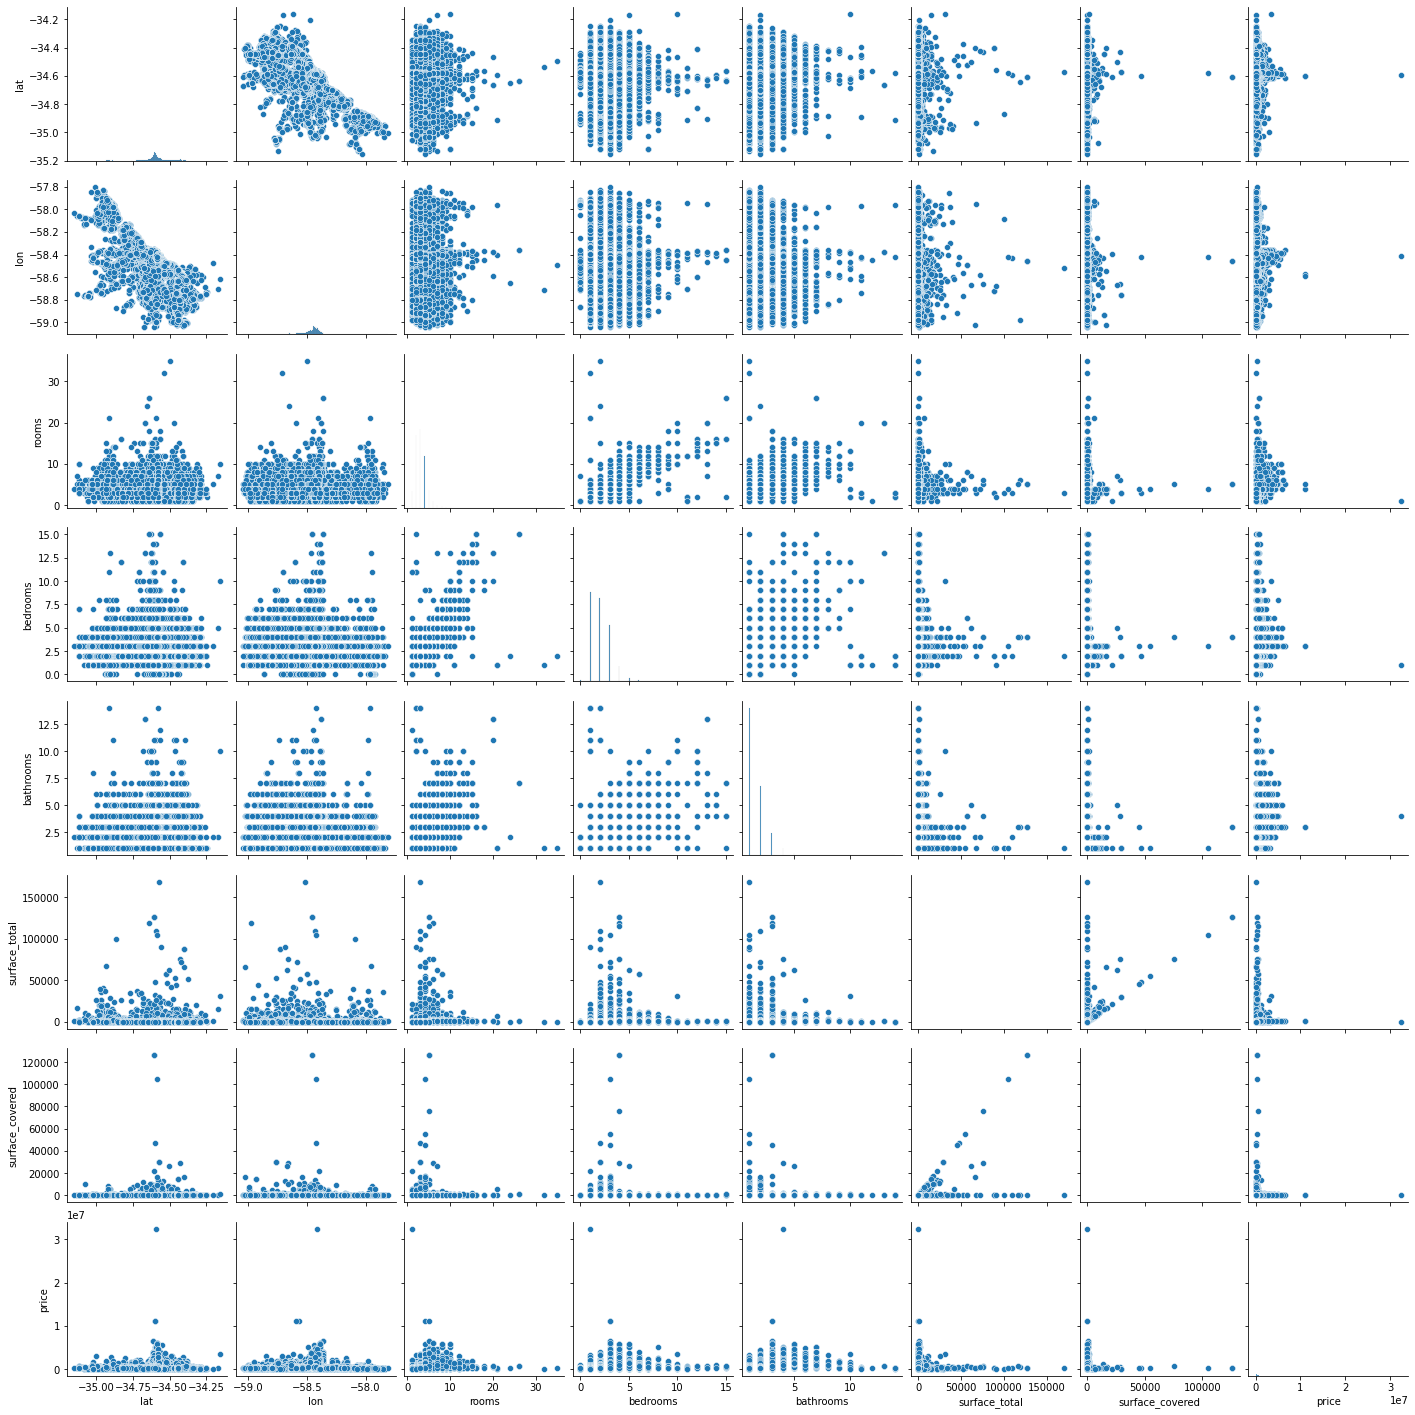

In [ ]:
sns.pairplot(data=prope_filtr)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

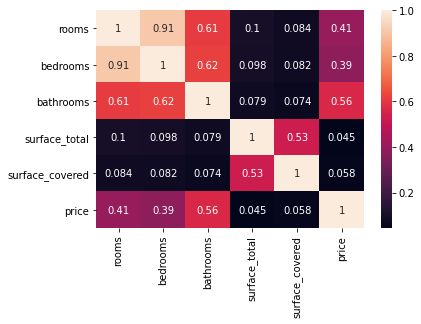

In [ ]:
matriz_corr = prope_filtr[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()



> En esta matriz de correlación general se puede observar que la cantidad de ambientes y la de dormitorios poseen una correlación del 91%. Por esta razón se prefirió optar por tener en cuenta solo una de las dos columnas.

> También se observa que el precio dependería en mayor medida del número de baños y ambientes.





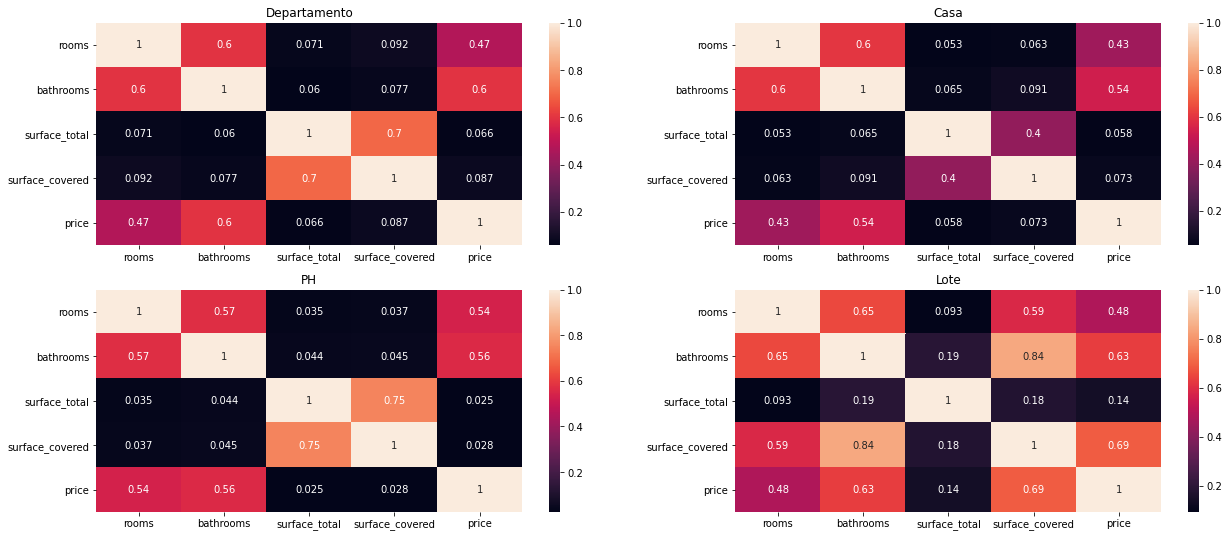

In [ ]:
plt.figure(figsize=(21,9))

plt.subplot(2,2,1)    # de los datos filtrados, analizo solo departamento
df_d = prope_filtr[(prope_filtr['property_type'] == 'Departamento')]

matriz_corr_d = df_d[['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
sns.heatmap(matriz_corr_d, annot=True)
plt.title('Departamento')


plt.subplot(2,2,2) #casa
df_c = prope_filtr[(prope_filtr['property_type'] == 'Casa')]

matriz_corr_c = df_c[['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
sns.heatmap(matriz_corr_c, annot=True)
plt.title('Casa')


plt.subplot(2,2,3) #ph
df_p = prope_filtr[(prope_filtr['property_type'] == 'PH')]

matriz_corr_p = df_p[['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
sns.heatmap(matriz_corr_p, annot=True)
plt.title('PH')


plt.subplot(2,2,4) #lote
df_l = prope_filtr[(prope_filtr['property_type'] == 'Lote')]

matriz_corr_l = df_l[['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
sns.heatmap(matriz_corr_l, annot=True)
plt.title('Lote')


plt.show()



> Aquí se observa que los lotes publicados presentan mayor correlación con el precio del inmueble, en comparación con los departamentos, casas y PH.



### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.




> ¿Cuál es el promedio de precio por m$^2$ de los departamentos en cada barrio de Capital Federal?
>
> La respuesta a esta pregunta no es generalizable, debe tenerse en cuenta que quedará supeditada a las ventas concretadas por Properati. También dependerá de la zona de ubicación del departamento, si incluye cochera, la antigüedad de la vivienda, su estado, entre otros.




In [ ]:
# creo un dataframe con el conjunto de datos que quiero analizar

df_desafio = prope[(prope['surface_total']>=prope['surface_covered']) &     # primer filtro
                   (prope['l2']=='Capital Federal') &
                   (prope['property_type'] == 'Departamento')]

df_desafio.dropna

df_desafio.loc[:,'price_m2'] = df_desafio['price'] / df_desafio['surface_total']   # creo la columna del precio por m2

df_desafio_bis = pd.DataFrame(df_desafio.groupby('l3')['price_m2'].mean())      # agrupo por barrio y calculo el promedio del precio por m2

df_desafio_bis.sort_values(by='price_m2', ascending=False)    # ordeno



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,price_m2
l3,
Puerto Madero,6092.833729
Las Cañitas,3877.048372
Palermo,3619.649375
Belgrano,3412.177831
Recoleta,3374.544120
Nuñez,3371.336686
Barrio Norte,3122.898484
Retiro,2966.142852
Coghlan,2877.966578


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
propefil = prope[
                 (prope['l2']=='Capital Federal') &
                ((prope['property_type'] == 'Departamento') |
                 (prope['property_type'] == 'Casa') |
                 (prope['property_type'] == 'PH')) &
                 (15 < prope['surface_total']) &
                 (1000 > prope['surface_total']) &
                 (prope['price'] < 4000000) &
                 (prope['surface_total'] >= prope['surface_covered'])                 
                ]

propefil = propefil.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'currency', 'title', 'description', 'property_type', 'operation_type'], axis=1)
propefil.dropna()
propefil.drop_duplicates()

propefil.shape


(81083, 6)

In [ ]:
print (propefil.isnull().values.any())

# Total missing values for each feature
print (propefil.isnull().sum())

True
rooms                0
bedrooms             0
bathrooms          829
surface_total        0
surface_covered      0
price                0
dtype: int64


In [ ]:
propefil.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


Text(0.5, 1.0, 'Matriz de correlación')

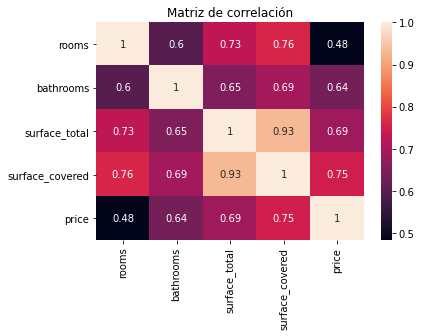

In [ ]:
# matriz de correlación para los datos filtrados

matriz_ml = propefil[['rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].corr()
sns.heatmap(matriz_ml, annot=True)
plt.title('Matriz de correlación')

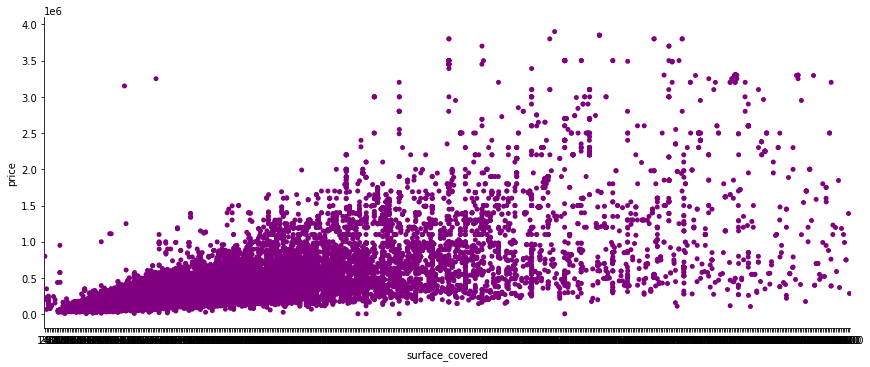

In [ ]:
sns.catplot(data = propefil, x = 'surface_covered', y = 'price', height=5, aspect=2.4, color = 'purple')

In [ ]:
X = propefil[['surface_covered']]
y = propefil['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



####**Árbol de decisión**


In [ ]:
clf_tree = DecisionTreeClassifier()              # crea árbol
clf_tree.fit(X_train, y_train)                   # entrena

y_pred = clf_tree.predict(X_test)                # predice

print('Accuracy score:', accuracy_score(y_test, y_pred))


Accuracy score: 0.0780678314491264


> "Accuracy score" indica la relación entre la cantidad de predicciones correctas y el total de muestras. Por lo tanto, es un valor que se encuentra entre 0 y 1. Cuanto más cerca esté de 1, mayor exactitud tendrá el modelo.


In [ ]:
# OPTIMIZACIÓN ÁRBOL

# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
       
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0.5, 1.0, 'Árbol de decisión')

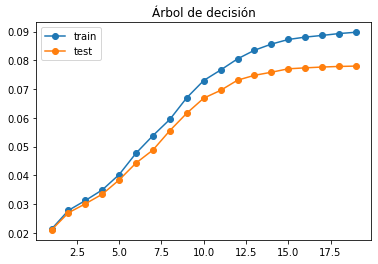

In [ ]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.title('Árbol de decisión')

> Basándome en el gráfico que compara los valores de accuracy para test y train según la profundidad del árbol de decisión, elijo trabajar con una profundidad de 12. Esto es porque en ese caso se observan los valores más altos de accuracy en la curva "test" sin llegar a complejizar demasiado el modelo.



####**Vecinos más cercanos**


In [ ]:
clf_knn = KNeighborsClassifier()                 # crea
clf_knn.fit(X_train, y_train)                    # entrena

y_pred = clf_knn.predict(X_test)                 # predice

print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.02655704008221994


In [ ]:
# OPTIMIZACIÓN VECINOS

# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:

    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)


Text(0.5, 1.0, 'Vecinos más cercanos')

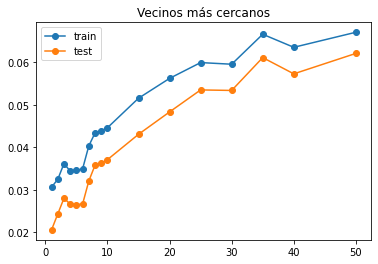

In [ ]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.title('Vecinos más cercanos')

> Basándome en el gráfico que compara los valores de accuracy para test y train según la cantidad de vecinos más cercanos, elijo trabajar con 35 vecinos. Esto es porque en ese caso se observan los picos más altos de accuracy en la curva "test" y la menor diferencia con la curva "train".

#### **Regresión**

In [ ]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=35)

In [ ]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                    weights='uniform')

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

[3619.56318225] -33330.9587795696


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 195816.79041785037
Raíz del error cuadrático medio en Test: 193598.1907767662


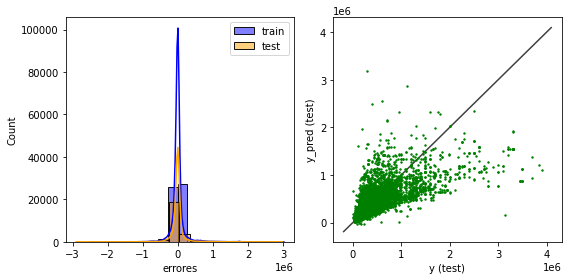

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 165982.40377121896
Raíz del error cuadrático medio en Test: 173049.85328744957


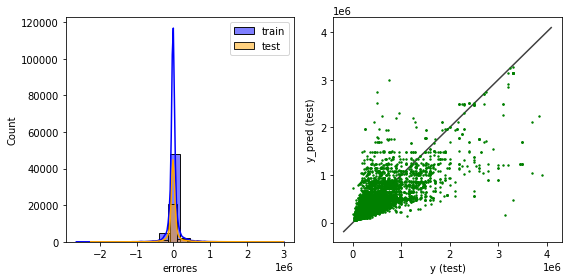

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 179937.08656691868
Raíz del error cuadrático medio en Test: 178312.09156106546


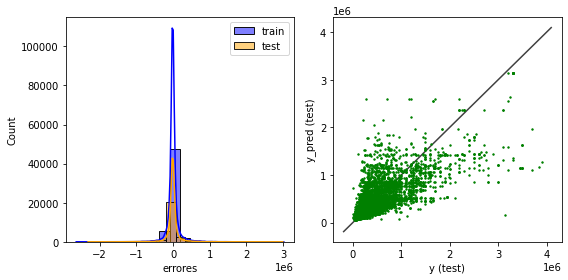

In [ ]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', kde = True, color = 'blue')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True, color = 'orange')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2, color = 'green')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

> Elegiría el modelo de árbol de decisión porque presenta menor raíz de error cuadrático medio.

> Con los valores calculados sería posible estimar el precio de una propiedad dada una determinada superficie cubierta con un error de aproximadamente 170 000 USD.

> Para obtener mejores resultados con los datos disponibles, agregaría la información relacionada con el barrio de Capital Federal en el que se encuentra la propiedad. Como se puede observar en el ítem 2.1, "Desafío", el precio por m$^2$ difiere en los distintos puntos de la ciudad.

> Además, se está intentando estimar el precio de un inmueble sin discriminar si se trata de un departamento, PH o casa.